In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

In [5]:
data = pd.read_csv('employee.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
data = data.drop_duplicates()
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.72,0.87,5,223,5,0,0,7,1,1
4,0.37,0.52,2,159,3,0,0,7,1,1


In [10]:
dept = LabelEncoder()
data['department'] = dept.fit_transform(data['department'])

salary = LabelEncoder()
data['salary'] = salary.fit_transform(data['salary'])

C:\Users\zazz\AppData\Local\Temp\ipykernel_17620\3943354698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['department'] = dept.fit_transform(data['department'])
C:\Users\zazz\AppData\Local\Temp\ipykernel_17620\3943354698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['salary'] = salary.fit_transform(data['salary'])


In [11]:
data.left.value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [13]:
x = data.drop('left', axis=1)
y = data['left']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=6)

In [15]:
x_train.shape

(7194, 9)

In [16]:
from collections import Counter

In [17]:
smt = SMOTE()
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)
Counter(y_train_smt)

Counter({0: 6013, 1: 6013})

In [18]:
x_train_smt.shape

(12026, 9)

In [19]:
model1 = DecisionTreeClassifier()
model1.fit(x_train_smt, y_train_smt)
print('Train score: ', model1.score(x_train_smt, y_train_smt))
print('Test score: ', model1.score(x_test, y_test))

Train score:  1.0
Test score:  0.9460079216176777


In [20]:
model1.get_depth()

28

In [21]:
model2 = DecisionTreeClassifier(max_depth=22)
model2.fit(x_train_smt, y_train_smt)
print('Train score: ', model2.score(x_train_smt, y_train_smt))
print('Test score: ', model2.score(x_test, y_test))

Train score:  0.9993347746549144
Test score:  0.9445486762559934


In [25]:
# Predict on the test data
y_pred = model2.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(4797,))

In [26]:
pd.DataFrame({"True values":y_test, "Predicted values": y_pred})

,True values,Predicted values
10754,0,0
5149,0,0
3446,0,0
90,1,1
8129,0,0
...,...,...
9721,0,0
8502,0,0
10800,0,0
3971,0,0


In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3783,  204],
       [  62,  748]])

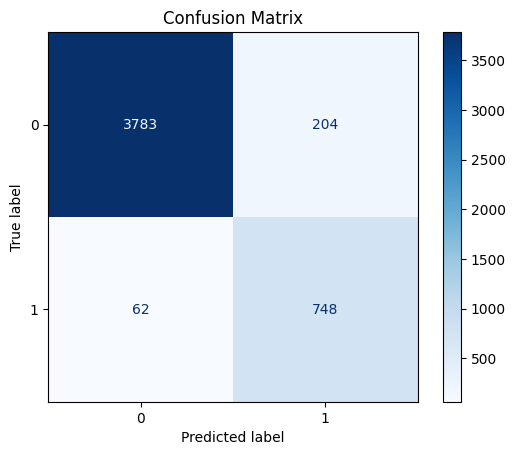

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [30]:
# Generate  classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3987
           1       0.79      0.92      0.85       810

    accuracy                           0.94      4797
   macro avg       0.88      0.94      0.91      4797
weighted avg       0.95      0.94      0.95      4797

